In [ ]:
# %matplotlib inline


# Using KBinsDiscretizer to discretize continuous features

The example compares prediction result of linear regression (linear model)
and decision tree (tree based model) with and without discretization of
real-valued features.

As is shown in the result before discretization, linear model is fast to
build and relatively straightforward to interpret, but can only model
linear relationships, while decision tree can build a much more complex model
of the data. One way to make linear model more powerful on continuous data
is to use discretization (also known as binning). In the example, we
discretize the feature and one-hot encode the transformed data. Note that if
the bins are not reasonably wide, there would appear to be a substantially
increased risk of overfitting, so the discretizer parameters should usually
be tuned under cross validation.

After discretization, linear regression and decision tree make exactly the
same prediction. As features are constant within each bin, any model must
predict the same value for all points within a bin. Compared with the result
before discretization, linear model become much more flexible while decision
tree gets much less flexible. Note that binning features generally has no
beneficial effect for tree-based models, as these models can learn to split
up the data anywhere.


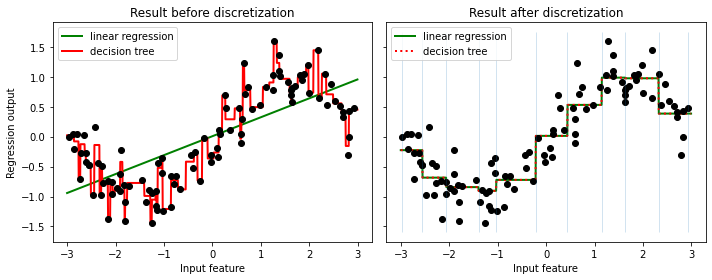

In [1]:
# Author: Andreas Müller
#         Hanmin Qin <qinhanmin2005@sina.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor

# construct the dataset
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
X = X.reshape(-1, 1)

# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode="onehot")
X_binned = enc.fit_transform(X)

# predict with original dataset
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color="green", label="linear regression")
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color="red", label="decision tree")
ax1.plot(X[:, 0], y, "o", c="k")
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

# predict with transformed dataset
line_binned = enc.transform(line)
reg = LinearRegression().fit(X_binned, y)
ax2.plot(
    line,
    reg.predict(line_binned),
    linewidth=2,
    color="green",
    linestyle="-",
    label="linear regression",
)
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X_binned, y)
ax2.plot(
    line,
    reg.predict(line_binned),
    linewidth=2,
    color="red",
    linestyle=":",
    label="decision tree",
)
ax2.plot(X[:, 0], y, "o", c="k")
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=0.2)
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")

plt.tight_layout()
plt.show()

In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source packages
from sklearn.preprocessing import PowerTransformer
from feature_engine import transformation as vt
# from feature_engine.variable_transformers import BoxCoxTransformer

In [2]:
# boston.csv in local file 
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
Things = data.columns
Things

In [ ]:
from sklearn import preprocessing, tree
from dtreeviz.trees import dtreeviz

Things = {'Feature01': [3,4,5,0], 
          'Feature02': [4,5,6,0], 
          'Feature03': [1,2,3,8], 
          'Target01': ['Red','Blue','Teal','Red']}
df = pd.DataFrame(Things,
                  columns= ['Feature01', 'Feature02', 
                            'Feature02', 'Target01']) 

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df.Target01)
df['target'] = label_encoder.transform(df.Target01)

classifier = tree.DecisionTreeClassifier()
classifier.fit(df.iloc[:,:3], df.target)

dtreeviz(classifier,
         df.iloc[:,:3],
         df.target,
         target_name='toy',
         feature_names=df.columns[0:3],
         class_names=list(label_encoder.classes_)
         )

# enter image description here